In [72]:
import pandas as pd
import os
import re
import numpy as np
from scipy import stats
from pandas import set_option
from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
pwd

'/Users/sanjirsalsabil'

In [3]:
variable = pd.read_csv(r"/Users/sanjirsalsabil/Desktop/DSS Learning/ml_pipeline_bank_SalsabiL/bank.csv")
variable.head()


,age,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,class
0,30,married,primary,1787.0,no,no,19,oct,79,1,-1,0,no
1,33,married,secondary,4789.0,yes,yes,11,may,220,1,339,4,no
2,35,single,tertiary,1350.0,yes,no,16,apr,185,1,330,1,no
3,30,married,tertiary,1476.0,yes,yes,3,jun,199,4,-1,0,no
4,59,married,secondary,0.0,yes,no,5,may,226,1,-1,0,no


In [29]:
variable.isnull().sum()

age           0
marital       0
education     5
balance      15
housing       0
loan          0
day           0
month        21
duration      0
campaign      0
pdays         0
previous      0
class         0
dtype: int64

In [32]:
variable[variable['education'].isnull()]

,age,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,class
33,32,single,NaN,2536.0,yes,no,26,aug,958,6,-1,0,yes
153,55,married,NaN,8104.0,no,no,6,feb,213,2,-1,0,no
224,54,married,NaN,1691.0,yes,no,20,nov,186,1,-1,0,no
3078,36,married,NaN,1587.0,yes,no,28,jul,200,2,-1,0,no
4074,53,married,NaN,4086.0,no,no,20,jun,14,3,-1,0,no


In [33]:
variable[variable['balance'].isnull()]

,age,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,class
17,37,single,tertiary,NaN,yes,no,20,apr,114,1,152,2,no
40,38,single,tertiary,NaN,yes,no,17,nov,609,2,101,3,no
43,32,married,tertiary,NaN,yes,no,13,may,205,3,-1,0,no
89,34,married,secondary,NaN,yes,no,20,may,203,2,-1,0,no
318,35,married,secondary,NaN,no,no,4,may,429,4,164,2,yes
405,45,married,secondary,NaN,yes,no,7,aug,159,2,-1,0,no
452,27,married,secondary,NaN,yes,yes,28,may,266,2,-1,0,no
555,37,married,secondary,NaN,yes,no,8,may,682,2,85,7,no
2294,48,married,secondary,NaN,no,yes,3,feb,47,2,222,3,no
3461,34,single,secondary,NaN,no,no,20,nov,205,6,-1,0,no


In [34]:
variable[variable['month'].isnull()]

,age,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,class
30,68,divorced,secondary,4189.0,no,no,14,NaN,897,2,-1,0,yes
310,49,married,secondary,8545.0,yes,yes,6,NaN,199,7,167,1,no
327,35,single,tertiary,145.0,yes,no,18,NaN,799,2,-1,0,yes
794,29,single,secondary,908.0,yes,no,20,NaN,1663,1,-1,0,yes
835,27,single,secondary,-151.0,no,no,8,NaN,283,2,-1,0,no
1065,30,married,tertiary,0.0,yes,no,18,NaN,756,1,-1,0,no
1098,37,single,secondary,0.0,no,no,4,NaN,69,2,-1,0,no
1145,59,married,primary,0.0,yes,no,28,NaN,97,2,-1,0,no
1154,47,married,secondary,1934.0,no,yes,14,NaN,225,1,364,1,no
3850,51,married,primary,377.0,yes,no,3,NaN,143,4,272,1,no


In [35]:
variable.notnull().head()

,age,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,class
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True


In [36]:
variable.shape

(4521, 13)

In [37]:
variable.dropna()

,age,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,class
0,30,married,primary,1787.0,no,no,19,oct,79,1,-1,0,no
1,33,married,secondary,4789.0,yes,yes,11,may,220,1,339,4,no
2,35,single,tertiary,1350.0,yes,no,16,apr,185,1,330,1,no
3,30,married,tertiary,1476.0,yes,yes,3,jun,199,4,-1,0,no
4,59,married,secondary,0.0,yes,no,5,may,226,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,married,secondary,-333.0,yes,no,30,jul,329,5,-1,0,no
4517,57,married,tertiary,-3313.0,yes,yes,9,may,153,1,-1,0,no
4518,57,married,secondary,295.0,no,no,19,aug,151,11,-1,0,no
4519,28,married,secondary,1137.0,no,no,6,feb,129,4,211,3,no


In [38]:
variable.dropna(how = 'any').shape

(4480, 13)

In [39]:
variable.dropna(how = 'all').shape

(4521, 13)

In [40]:
variable.columns

Index(['age', 'marital', 'education', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'class'],
      dtype='object')

In [41]:
variable.dropna(subset = ['education', 'balance', 'month'],how='all').shape

(4521, 13)

In [42]:
variable.dropna(how='any', thresh=1).shape

(4521, 13)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

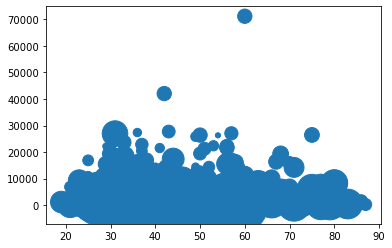

In [52]:
plt.scatter(variable['age'], variable['balance'], variable['duration'])

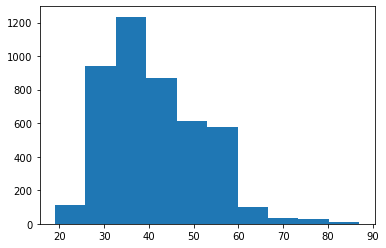

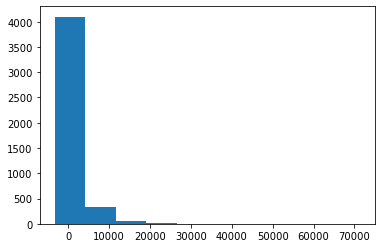

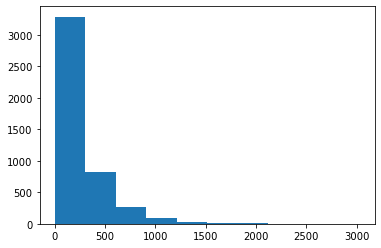

In [49]:
plt.hist(variable.age)
plt.show()
plt.hist(variable.balance)
plt.show()
plt.hist(variable.duration)
plt.show()

In [58]:
#detect_Outliers

lower_bound = 0.1
upper_bound = 0.95
res = variable.balance.quantile([lower_bound, upper_bound])
print(res)

0.10       0.00
0.95    6101.75
Name: balance, dtype: float64


In [59]:
max_threshold = variable['balance'].quantile(0.95)
max_threshold

6101.75

In [60]:
variable[variable['balance']>max_threshold]

,age,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,class
10,39,married,secondary,9374.0,yes,no,20,may,273,1,-1,0,no
64,56,married,secondary,16873.0,no,no,7,oct,223,1,-1,0,no
72,31,single,tertiary,6248.0,yes,no,9,may,154,2,-1,0,no
94,57,married,secondary,14093.0,no,no,11,aug,231,5,-1,0,no
139,60,married,unknown,6313.0,no,no,19,jun,39,2,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440,45,married,primary,13117.0,no,no,11,jun,42,2,-1,0,no
4441,38,married,tertiary,12877.0,no,no,17,jun,118,3,-1,0,no
4451,55,married,tertiary,6880.0,no,no,8,aug,353,2,-1,0,no
4457,37,single,primary,6969.0,yes,no,20,may,412,1,-1,0,no


In [61]:
min_threshold = variable['balance'].quantile(0.05)
min_threshold

-160.0

In [71]:
variable.shape
variable.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4506.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1419.931869,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.399251,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,68.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,443.500000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1471.750000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [73]:
variable.dtypes

age            int64
marital       object
education     object
balance      float64
housing       object
loan          object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
class         object
dtype: object

In [81]:
variable.day=pd.to_datetime(variable.day)
variable.head(5)

,age,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,class
0,30,married,primary,1787.0,no,no,1970-01-01 00:00:00.000000019,NaT,79,1,-1,0,no
1,33,married,secondary,4789.0,yes,yes,1970-01-01 00:00:00.000000011,NaT,220,1,339,4,no
2,35,single,tertiary,1350.0,yes,no,1970-01-01 00:00:00.000000016,NaT,185,1,330,1,no
3,30,married,tertiary,1476.0,yes,yes,1970-01-01 00:00:00.000000003,NaT,199,4,-1,0,no
4,59,married,secondary,0.0,yes,no,1970-01-01 00:00:00.000000005,NaT,226,1,-1,0,no


In [93]:
#one_Hot_Encoding

dummies = pd.get_dummies(variable.education)

dummies


,primary,secondary,tertiary,unknown
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
4516,0,1,0,0
4517,0,0,1,0
4518,0,1,0,0
4519,0,1,0,0


In [94]:
merged = pd.concat([variable,dummies], axis = 'columns')
merged

,age,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,class,primary,secondary,tertiary,unknown
0,30,married,primary,1787.0,no,no,1970-01-01 00:00:00.000000019,NaT,79,1,-1,0,no,1,0,0,0
1,33,married,secondary,4789.0,yes,yes,1970-01-01 00:00:00.000000011,NaT,220,1,339,4,no,0,1,0,0
2,35,single,tertiary,1350.0,yes,no,1970-01-01 00:00:00.000000016,NaT,185,1,330,1,no,0,0,1,0
3,30,married,tertiary,1476.0,yes,yes,1970-01-01 00:00:00.000000003,NaT,199,4,-1,0,no,0,0,1,0
4,59,married,secondary,0.0,yes,no,1970-01-01 00:00:00.000000005,NaT,226,1,-1,0,no,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,married,secondary,-333.0,yes,no,1970-01-01 00:00:00.000000030,NaT,329,5,-1,0,no,0,1,0,0
4517,57,married,tertiary,-3313.0,yes,yes,1970-01-01 00:00:00.000000009,NaT,153,1,-1,0,no,0,0,1,0
4518,57,married,secondary,295.0,no,no,1970-01-01 00:00:00.000000019,NaT,151,11,-1,0,no,0,1,0,0
4519,28,married,secondary,1137.0,no,no,1970-01-01 00:00:00.000000006,NaT,129,4,211,3,no,0,1,0,0


In [96]:
final = merged.drop(['day', 'month', 'pdays','education','unknown'], axis='columns')
final

,age,marital,balance,housing,loan,duration,campaign,previous,class,primary,secondary,tertiary
0,30,married,1787.0,no,no,79,1,0,no,1,0,0
1,33,married,4789.0,yes,yes,220,1,4,no,0,1,0
2,35,single,1350.0,yes,no,185,1,1,no,0,0,1
3,30,married,1476.0,yes,yes,199,4,0,no,0,0,1
4,59,married,0.0,yes,no,226,1,0,no,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,married,-333.0,yes,no,329,5,0,no,0,1,0
4517,57,married,-3313.0,yes,yes,153,1,0,no,0,0,1
4518,57,married,295.0,no,no,151,11,0,no,0,1,0
4519,28,married,1137.0,no,no,129,4,3,no,0,1,0


In [97]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [98]:
x = final.drop('class', axis='columns')
x

,age,marital,balance,housing,loan,duration,campaign,previous,primary,secondary,tertiary
0,30,married,1787.0,no,no,79,1,0,1,0,0
1,33,married,4789.0,yes,yes,220,1,4,0,1,0
2,35,single,1350.0,yes,no,185,1,1,0,0,1
3,30,married,1476.0,yes,yes,199,4,0,0,0,1
4,59,married,0.0,yes,no,226,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,married,-333.0,yes,no,329,5,0,0,1,0
4517,57,married,-3313.0,yes,yes,153,1,0,0,0,1
4518,57,married,295.0,no,no,151,11,0,0,1,0
4519,28,married,1137.0,no,no,129,4,3,0,1,0


In [99]:
y = final.duration
y

0        79
1       220
2       185
3       199
4       226
       ... 
4516    329
4517    153
4518    151
4519    129
4520    345
Name: duration, Length: 4521, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x = variable[['age', 'balance']]
y = variable['duration']


In [106]:
print(x)

      age  marital  balance housing loan  duration  campaign  previous  \
0      30  married   1787.0      no   no        79         1         0   
1      33  married   4789.0     yes  yes       220         1         4   
2      35   single   1350.0     yes   no       185         1         1   
3      30  married   1476.0     yes  yes       199         4         0   
4      59  married      0.0     yes   no       226         1         0   
...   ...      ...      ...     ...  ...       ...       ...       ...   
4516   33  married   -333.0     yes   no       329         5         0   
4517   57  married  -3313.0     yes  yes       153         1         0   
4518   57  married    295.0      no   no       151        11         0   
4519   28  married   1137.0      no   no       129         4         3   
4520   44   single   1136.0     yes  yes       345         2         7   

      primary  secondary  tertiary  
0           1          0         0  
1           0          1         0  


In [107]:
print(y)

0        79
1       220
2       185
3       199
4       226
       ... 
4516    329
4517    153
4518    151
4519    129
4520    345
Name: duration, Length: 4521, dtype: int64


In [108]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
len(x_train)

3616

In [109]:
len(y_test)

905